# Example: Comparing Primary Flux Models

This file demonstrates how to use MUTE to do a simple propagation of 50 muons through standard rock with three different primary flux models and plots the ratios of the resulting true vertical intensities.

## Import Packages

In [1]:
import mute.constants as mtc
import mute.underground as mtu

import matplotlib.pyplot as plt
import numpy as np

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_directory("mute/data")
mtc.set_lab("Example")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(50)

## Calculate the True Vertical Intensities

The primary cosmic ray flux model can be set with the ``primary_model`` parameter. The desired slant depths can be specified in a list or an array with the ``depths`` parameter. Leaving it blank will calculate the intensities for steps of 0.5 km.w.e. between 1 and 12 km.w.e. as a default.

The ``mtu.calc_u_intensities_tr()`` function will call ``mtu.calc_u_fluxes()`` to calculate underground fluxes. This will call ``mts.calc_s_fluxes()`` to calculate surface flux matrices for the specified primary models using MCEq (if files for them do not already exist in the directory). It will then call ``mtp.propagate_muons()`` and ``mtp.calc_survival()`` to propagate the muons using PROPOSAL and use the resulting underground energies to calculate survival probabilities. Because the propagation does not depend on the primary flux model, it only gets run once. Although ``n_muon`` is set to ``50`` above, MUTE states that it is propagating 139150 muons because it propagates 50 muons for each of the 121 energy bins for each of the 23 slant depths ($50*121*23=139150$).

At each call of ``mtu.calc_u_intensities_tr()``, the output files for the surface flux, underground flux, and underground intensities will be overwritten. In order to avoid this, the lab can be set between calls using, for example, ``mtc.set_lab("Example_HG")``, then ``mtc.set_lab("Example_GH")``. To stop output files from being written for a certain call, the ``output`` parameter can be set to ``False``. To stop all output files from being written, the output can be set globally with ``mtc.set_output(False)``. Because ``verbose`` has been set to ``2``, MUTE will print out information about what it is doing every step along the way.

In [3]:
intensities_GSF = mtu.calc_u_intensities_tr(primary_model = "GSF") # GlobalSplitFitBeta
intensities_HG  = mtu.calc_u_intensities_tr(primary_model = "HG")  # HillasGaisser2012
intensities_GH  = mtu.calc_u_intensities_tr(primary_model = "GH")  # GaisserHonda

Calculating underground fluxes.
Loading surface fluxes for USStd using SIBYLL-2.3c and GSF.
Loaded surface fluxes.


No survival probability matrix currently exists for the set lab, medium, or number of muons. Would you like to create one (y/n)?:  y
No underground energy file currently exists for the set lab, medium, or number of muons. Would you like to create one (y/n)?: y


Creating propagator.


  8%|▊         | 10/121 [00:00<00:01, 95.15it/s]

Finished creating propagator.
Propagating 139150 muons.


100%|██████████| 121/121 [1:53:14<00:00, 56.15s/it] 


Finished propagation.
Underground energies written to mute/data/underground_energies/rock_2.65_50_Underground_Energies_0.txt.
Calculating survival probabilities.
Finished calculating survival probabilities.
Survival probabilities written to mute/data/survival_probabilities/rock_2.65_50_Survival_Probabilities.txt.
Finished calculating underground fluxes.
Underground fluxes written to mute/data/underground/Example_Underground_Fluxes.txt.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to mute/data/underground/Example_Underground_Intensities_TR.txt.
Calculating underground fluxes.
Loading surface fluxes for USStd using SIBYLL-2.3c and HG.


No surface flux matrix currently exists for these models. Would you like to create one (y/n)?:  y


Calculating surface fluxes for USStd using SIBYLL-2.3c and HG.
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)


100%|██████████| 45/45 [17:58<00:00, 23.96s/it]


Finished calculating surface fluxes.
Surface fluxes written to mute/data/surface_fluxes/Surface_Fluxes_USStd_SIBYLL-2.3c_HG.txt.
Loading survival probabilities from mute/data/survival_probabilities/rock_2.65_50_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Underground fluxes written to mute/data/underground/Example_Underground_Fluxes.txt.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to mute/data/underground/Example_Underground_Intensities_TR.txt.
Calculating underground fluxes.
Loading surface fluxes for USStd using SIBYLL-2.3c and GH.


No surface flux matrix currently exists for these models. Would you like to create one (y/n)?:  y


Calculating surface fluxes for USStd using SIBYLL-2.3c and GH.
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GaisserHonda 
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)


100%|██████████| 45/45 [18:10<00:00, 24.23s/it]


Finished calculating surface fluxes.
Surface fluxes written to mute/data/surface_fluxes/Surface_Fluxes_USStd_SIBYLL-2.3c_GH.txt.
Loading survival probabilities from mute/data/survival_probabilities/rock_2.65_50_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Underground fluxes written to mute/data/underground/Example_Underground_Fluxes.txt.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to mute/data/underground/Example_Underground_Intensities_TR.txt.


## Plot the Results

Because depths were not specified in the ``mtu.calc_u_intensities_tr()`` calls above, the true vertical intensities were calculated for the default 23 slant depths stored in ``mtc.slant_depths``. There is not much visible variation between the primary flux models in the true vertical intensity, so instead of plotting the intensities themselves, plot the ratios of the intensities calculated with HG and GH to those calculated with GSF.

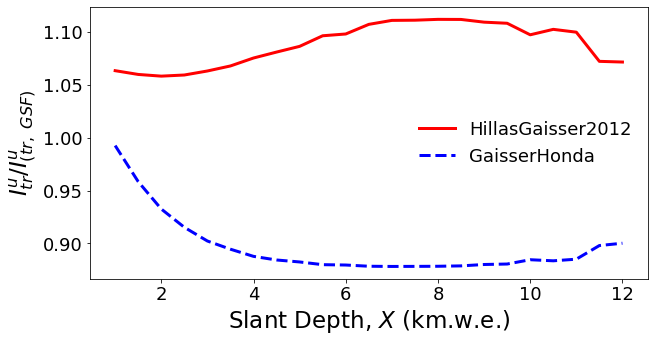

In [4]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.plot(mtc.slant_depths, intensities_HG/intensities_GSF, color = "red", lw = 3, ls = "-", label = "HillasGaisser2012")
ax.plot(mtc.slant_depths, intensities_GH/intensities_GSF, color = "blue", lw = 3, ls = "--", label = "GaisserHonda")

ax.set_xlabel("Slant Depth, $X$ (km.w.e.)", fontsize = 23)
ax.set_ylabel(r"$I^u_{tr}/I^u_{(tr,\ GSF)}$", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)

plt.legend(frameon = False, fontsize = 18)

plt.show()